In [2]:
pwd

'/Users/vvr/jupyter/network_regularisation_test/simulations'

In [4]:
def cov_from_G(G, a): ### Covariance is inverse of L + a*I
    L = nx.laplacian_matrix(G)
    p = L.shape[0]
    C = la.inv(L.todense() + a*np.identity(p))
    return C

In [5]:
from ../graph_utils import Cov_from_G


SyntaxError: invalid syntax (588137539.py, line 1)

In [42]:
import matplotlib.pyplot as plt
import examples
import numpy as np
import pywt
from numpy import linalg as la
import timeit
from copy import deepcopy
import networkx as nx
import seaborn as sb

def toeplitz_covariance(a, p):
    return np.exp(-np.log(a) * np.abs(np.subtract.outer(range(p),
                    range(p))))

def gaussian_sample(n, p, beta_star, Psi, sigma, set_seed=1):
    np.random.seed(set_seed)
    print(beta_star.shape, Psi.shape)
    X = np.random.multivariate_normal(mean = np.zeros(p),
                                      cov=Psi, size=n)
    y = X.dot(beta_star)+ sigma * np.random.normal(size=n)
    return X, y


import matplotlib.pyplot as plt
import examples
import numpy as np
import pywt
from numpy import linalg as la
import timeit
from copy import deepcopy
import networkx as nx
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pywt
import random
import time




class Example:
    def __init__(self):
        self.G = nx.Graph()
        self.n_nodes = nx.number_of_nodes(self.G)
        self.coordinates = None

    def plot_signal(self):
        plt.figure()
        plt.plot(range(len(self.beta_star)), self.beta_star)
        plt.show()

    def draw_graph(self, node_size=1,
                   axis=False):
        fig, ax = plt.subplots()
        if self.coordinates is None:

            nx.draw(self.G, node_color=self.beta_star, cmap='Spectral', ax=ax)
        else:
            plt.figure()
            nx.draw(self.G, pos = self.coordinates, node_color=self.beta_star,
                    node_size = node_size,
                    cmap='Spectral', ax =ax)
        if axis:
            ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
        plt.show()

    def plot_adjacency(self):
        return


class Smooth2D(Example):
    def __init__(self, side_len: int=30, disk_radi: float =3.,
                 period: float=3., height: float=4., start_value: float=2):
        if side_len % 2 == 0:
            left_end = -(side_len//2) + 1
        else:
            left_end = -(side_len//2)
        x, y = np.meshgrid(np.linspace(left_end, side_len//2, side_len),
                           np.linspace(left_end, side_len//2, side_len))
        ds = np.sqrt(x**2 + y**2)
        ds = pywt.threshold(ds, disk_radi, 'soft')
        ds[abs(ds) > period] = -period
        ds = np.array([x + period/2 for x in ds])
        part = np.sin(np.pi*ds/period)
        self.beta_star = np.array([height/2 * x + start_value + height/2 for x in part]).flatten()
        self.G = nx.grid_graph(dim=((len(x), len(y))))
        self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
        self.coordinates = {k : n for k, n in enumerate(self.G.nodes)}

    def plot_3d():
        return

from sklearn.cluster import SpectralClustering

class GeneralGraph(Example):
    def __init__(self,G, start_value: float=0., height: float=1.,
                nb_clusters=2, sigma_gen=0.3, signal_type ="tree"):
        self.G = G
        self.coordinates = None
        self.n_nodes = nx.number_of_nodes(self.G)
        self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
        self.beta_star = np.zeros(self.n_nodes)
        #### Define what kind of signal we want
        if signal_type == "piecewise_cnst":
            ### Cluster the nodes
            ### decrease sigma_gen for more smoothness
            clustering = SpectralClustering(n_clusters=nb_clusters, assign_labels='discretize',random_state=0,
                                           affinity='precomputed').fit(nx.adjacency_matrix(G))
            for i in np.unique(clustering.labels_):
                mu = np.random.normal(loc=np.random.normal(loc=0.0, scale=sigma_gen))
                self.beta_star[np.where(clustering.labels_ == i)] = mu
                print([i, mu])
        else:
            ### Find MST
            T = nx.minimum_spanning_tree(G)
            edges_T = nx.incidence_matrix(T)
            #### generate edges differences:
            edges_diff = np.random.normal(loc=0, scale=sigma_gen, size=edges_T.shape[1])
            self.beta_star = np.linalg.pinv(edges_T.todense()).T.dot(edges_diff)
        self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())

had to delete oriented argument in adjacency matrix (not a thing..?)

/var/folders/19/sxn1rm81105bg9w40cjxr_kc0000gn/T/ipykernel_22882/2213382032.py:94: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/var/folders/19/sxn1rm81105bg9w40cjxr_kc0000gn/T/ipykernel_22882/2213382032.py:107: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  edges_T = nx.incidence_matrix(T)
/var/folders/19/sxn1rm81105bg9w40cjxr_kc0000gn/T/ipykernel_22882/2213382032.py:111: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


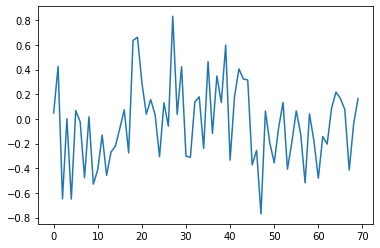

In [7]:
n = 70
p = 1
m1 = 30
m2 = 6
m = 55
G = nx.powerlaw_cluster_graph(n, m, p)

test = GeneralGraph(G, 10, 20)

test.n_nodes

plt.plot(test.beta_star)

In [28]:
y = examples.Example()

In [29]:
stairs = examples.SmoothStair()

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:55: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


In [30]:
barbell = examples.BarbellGraph(length_chain = 20, size_clique = 2)

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:65: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:68: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


In [18]:
def project_op(vector, param): 
    vector[vector > param] = param
    vector[vector < -param] = -param
    return vector

In [32]:
c = np.array([-2, 3, 5, -1, -10, 24, 8, 4])

In [33]:
np.argmax(np.abs(c))

5

In [87]:
def cgd_solver_greedy(X, y, Gamma, lambda1, lambda2, eps = 1e-5, max_it = 50000):
    start_time = timeit.default_timer()
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv

    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v

    u = np.zeros(m)
    n_iter = 0
    comps = 0
    #print(m)
    prev_u = 1 # For stopping criteria
    gradient = -np.copy(Q.dot(np.ones(b.shape[0])-b))
    
    print(timeit.default_timer() - start_time)
    print("proj gradient", gradient)
    
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return X_til_pinv @ (y_v - Gamma_v.T @ u), n_iter, comps
        #projected_gradient = u - project_op(u - gradient, lambda1)
        projected_gradient = project_op(u - gradient, lambda1)
        greedy_coord = np.argmax(np.abs(projected_gradient))
        i = greedy_coord
        delta = min(max(u[i] - ((1/Q[i,i]) * -gradient[i]), -lambda1), lambda1) - u[i]
        gradient += delta *Q[i]
        u[i] += delta
        
        #add back well conditioned block...? 
        print( "i is " + str(i))
        print(delta)

        #u[i] = np.sign(t) * min(np.abs(t), lambda1)   #there should be better truncation methods
        if (la.norm(u - prev_u) <= eps) & (n_iter>10):
            print("break reason 1")
            break
        
#         print(gradient)
#         if la.norm(gradient) <= eps:
#             print("break reason gradient")
#             break

        prev_u = np.copy(u)   # Recall array is similar to list
        

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter, comps

In [9]:
test_probs = np.random.rand(3, 3)
test_probs = (test_probs + test_probs.T)/2
test_probs 

array([[0.59791556, 0.84806572, 0.68208358],
       [0.84806572, 0.75796541, 0.52797368],
       [0.68208358, 0.52797368, 0.88655349]])

In [10]:
test_probs

array([[0.59791556, 0.84806572, 0.68208358],
       [0.84806572, 0.75796541, 0.52797368],
       [0.68208358, 0.52797368, 0.88655349]])

In [58]:
n = 200
p = 0.8
m1 = 30
m2 = 6
m = 120
sizes = [55, 78, 88]
probs = [[0.25, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]
G = nx.stochastic_block_model(sizes, probs)
#(self,G, length_chain, size_clique, start_value: float=0., height: float=1.,
 # nb_clusters=2, sigma_gen=0.3, signal_type ="tree")
power = GeneralGraph(G,  nb_clusters=3)

#test.n_nodes

#plt.plot(test.beta_star)

/var/folders/19/sxn1rm81105bg9w40cjxr_kc0000gn/T/ipykernel_22882/1547666199.py:94: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/var/folders/19/sxn1rm81105bg9w40cjxr_kc0000gn/T/ipykernel_22882/1547666199.py:109: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  edges_T = nx.incidence_matrix(T)
/var/folders/19/sxn1rm81105bg9w40cjxr_kc0000gn/T/ipykernel_22882/1547666199.py:113: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


In [59]:
power.beta_star

array([ 0.4060138 , -0.03847042,  0.01696475,  0.11992147, -0.61872328,
        0.08675176, -0.00526553, -0.36209202,  0.16709099, -0.08888137,
       -0.68027137,  0.29776363,  0.02856152, -0.33098999,  0.30304378,
       -0.17692082, -0.72488462,  0.42189055, -0.8402129 , -0.12680091,
       -0.55356168, -0.45988836,  0.40696841, -0.03412397, -0.42699161,
        0.121954  ,  0.56674464, -0.46324074,  0.31898589,  0.14508758,
       -0.71493559, -0.5812574 ,  0.27432632, -0.55367974, -0.78585426,
        0.13148405, -0.18920653,  0.44702212, -0.86515636,  0.42478371,
       -0.5819563 , -0.45101928, -0.44698255, -0.1166293 , -0.03431498,
       -0.21011864, -0.1710469 , -0.93513094,  0.04763073,  0.03868971,
       -0.2030867 ,  0.36428275,  0.02765188, -0.1251242 ,  0.09399128,
       -0.17424072,  1.17000779,  0.66223327,  0.52398317, -0.02311761,
        0.89300659, -0.56201922, -0.19839405, -0.12706717,  0.01113437,
        0.99622421,  0.22268923, -0.15339039, -0.32323517,  0.62

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


(221,) (221, 221)
1.1644996470131446
proj gradient [-0.05971997 -0.10849014 -0.19321877 ...  0.08883616  0.06590918
 -0.04208647]
i is 0
-1e-07
i is 0
0.0
i is 0
0.0
i is 0
0.0
i is 0
0.0
i is 0
0.0
i is 0
0.0
i is 0
0.0
i is 0
0.0
i is 0
0.0
i is 0
0.0
break reason 1
duration parallel cgd: 1.2260014690109529
iters parallel cgd: 11
update_loops parallel cgd: 0
beta_normal [ 2.19689047e-01 -9.12614100e-02 -4.43529575e-02  5.83995067e-02
 -4.00381552e-01 -5.31311744e-02  3.69652728e-03 -2.73469392e-01
 -2.16603287e-02  8.21050563e-03 -5.12374573e-01  1.60201001e-01
 -5.83009919e-02 -1.74877744e-01  2.14950013e-01 -1.29374001e-01
 -4.86384312e-01  3.29540227e-01 -6.90307873e-01 -1.48677945e-01
 -3.75178709e-01 -3.30095993e-01  3.20989477e-01 -3.63658621e-02
 -3.40167846e-01  1.19920924e-01  4.24871670e-01 -3.35930902e-01
  1.76626921e-01  5.58861052e-02 -5.87286848e-01 -5.09641835e-01
  2.30094835e-01 -4.40736243e-01 -7.07304247e-01  1.11491345e-01
 -1.52813138e-01  2.60544552e-01 -6.8782

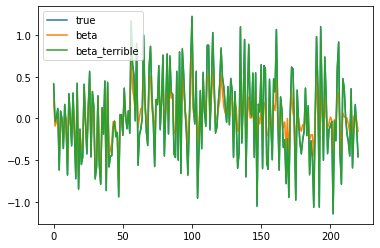

In [88]:
X, y = gaussian_sample(5000, power.n_nodes, beta_star = power.beta_star, Psi = cov_from_G(power.G, 0.1), sigma = 0.1)

# #X, y = gaussian_sample(10000, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 2)
# start_time = timeit.default_timer()
# beta, iters, comps = cgd_solver(X, y, power.incidence, lambda1 = 1, lambda2 = 1)
# end_time = timeit.default_timer()
# duration = end_time - start_time
# print("duration normal cgd:", duration)
# print("iters normal cgd:", iters)
# print("computations?", comps)


start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_greedy(X, y, power.incidence, lambda1 = 0.0000001, lambda2 = 0, eps = 1e-9)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", update_loops)

print("beta_normal", beta)
print("beta_parallel", beta_parallel)
print("normed diff normal", la.norm(beta - power.beta_star)/np.sqrt(len(beta)))
print("normed diff parallel", la.norm(beta_parallel - power.beta_star)/np.sqrt(len(beta_parallel)))


plt.plot(power.beta_star, label = 'true')
plt.plot(beta, label = 'beta')
plt.plot(beta_parallel, label = 'beta_terrible')

plt.legend()

#print(np.max(la.norm(beta - barbell.beta_star)), np.max(la.norm(beta_parallel - barbell.beta_star)))


In [81]:
beta_parallel

array([ 4.17078552e-01, -4.07887384e-02,  5.52114288e-03,  1.19076326e-01,
       -6.17622197e-01,  8.87000845e-02, -3.74453280e-03, -3.57066977e-01,
        1.66417870e-01, -7.77940969e-02, -6.78259424e-01,  2.92021823e-01,
        2.42872876e-02, -3.18428497e-01,  3.04410318e-01, -1.69721799e-01,
       -7.14138752e-01,  4.18271212e-01, -8.50044649e-01, -1.31327263e-01,
       -5.45975439e-01, -4.64143143e-01,  4.11624947e-01, -3.06251746e-02,
       -4.21861392e-01,  1.22387277e-01,  5.53833874e-01, -4.60628829e-01,
        3.23499952e-01,  1.42518500e-01, -7.28305044e-01, -5.85914731e-01,
        2.66648447e-01, -5.60221553e-01, -7.91461878e-01,  1.25094510e-01,
       -1.82200240e-01,  4.48614483e-01, -8.62440593e-01,  4.35877486e-01,
       -5.80162747e-01, -4.52671524e-01, -4.44071294e-01, -1.14292117e-01,
       -3.03150774e-02, -2.22501104e-01, -1.67665244e-01, -9.41257722e-01,
        4.06756283e-02,  4.72915751e-02, -2.00623881e-01,  3.58300681e-01,
        3.43231697e-02, -

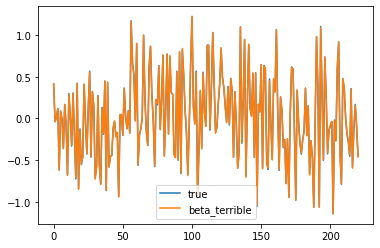

In [83]:
plt.plot(power.beta_star, label = 'true')
plt.plot(beta_parallel, label = 'beta_terrible')

plt.legend()


In [40]:
n = 500237
procs = 5
c = np.zeros(n)

In [37]:
np.array_split(c, procs)[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [39]:
for i in split(c, 5): 
    print(i.shape)

(100048,)
(100048,)
(100047,)
(100047,)
(100047,)


In [ ]:
range(5)


In [67]:
n

500237

In [69]:
np.linspace(n, 5)

array([5.00237000e+05, 4.90028184e+05, 4.79819367e+05, 4.69610551e+05,
       4.59401735e+05, 4.49192918e+05, 4.38984102e+05, 4.28775286e+05,
       4.18566469e+05, 4.08357653e+05, 3.98148837e+05, 3.87940020e+05,
       3.77731204e+05, 3.67522388e+05, 3.57313571e+05, 3.47104755e+05,
       3.36895939e+05, 3.26687122e+05, 3.16478306e+05, 3.06269490e+05,
       2.96060673e+05, 2.85851857e+05, 2.75643041e+05, 2.65434224e+05,
       2.55225408e+05, 2.45016592e+05, 2.34807776e+05, 2.24598959e+05,
       2.14390143e+05, 2.04181327e+05, 1.93972510e+05, 1.83763694e+05,
       1.73554878e+05, 1.63346061e+05, 1.53137245e+05, 1.42928429e+05,
       1.32719612e+05, 1.22510796e+05, 1.12301980e+05, 1.02093163e+05,
       9.18843469e+04, 8.16755306e+04, 7.14667143e+04, 6.12578980e+04,
       5.10490816e+04, 4.08402653e+04, 3.06314490e+04, 2.04226327e+04,
       1.02138163e+04, 5.00000000e+00])

In [65]:
[np.array_split(c, procs)[i].shape for i in range(5)]

[(100048,), (100048,), (100047,), (100047,), (100047,)]

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:65: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:68: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


(390,) (390, 390)
(390,) (390, 390)
duration normal cgd: 73.1446063839976
iters normal cgd: 41
computations? 692941
36.61757570999907
[-0.00974368  0.04126917  0.01893243 ...  0.02567847  0.01810736
 -0.00757111]
break reason 1
duration parallel cgd: 37.210274778990424
iters parallel cgd: 2
update_loops parallel cgd: 0
beta_normal [ 1.92816159e-02  2.67430446e-02 -5.83634260e-03  7.24723629e-03
 -5.03401807e-03  3.54236679e-03  5.90800549e-03  1.26777606e-02
 -2.55954026e-02  8.14901452e-03 -6.72069564e-03  1.54157323e-02
  9.10366900e-03  5.90800534e-03 -2.56442257e-03  6.69725370e-03
  4.70447607e-03 -3.25963845e-03  1.08907300e-02  2.43964943e-02
  1.39283149e-02  7.91375683e-04 -1.58554200e-02  1.84696280e-02
  1.04799251e-02 -2.30176844e-03 -2.30176844e-03  5.90800535e-03
 -9.66616914e-04  1.39283150e-02  5.33122616e-04 -2.55954026e-02
  7.24723628e-03  4.92249752e-03 -1.39877329e-02  2.74643325e-02
  3.66708097e-02 -1.08381876e-02  3.92513341e-04 -8.07798022e-03
  2.32013614e-03 

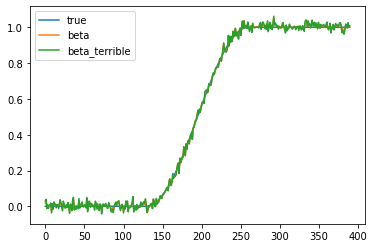

In [76]:
barbell = examples.BarbellGraph(length_chain = 130, size_clique = 130)
X, y = gaussian_sample(5000, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 2)

X, y = gaussian_sample(10000, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 2)
start_time = timeit.default_timer()
beta, iters, comps = cgd_solver(X, y, barbell.incidence, lambda1 = 1, lambda2 = 1)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)
print("computations?", comps)


start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_greedy(X, y, barbell.incidence, lambda1 = 1, lambda2 = 1)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", update_loops)

print("beta_normal", beta)
print("beta_parallel", beta_parallel)
print("normed diff normal", la.norm(beta - barbell.beta_star)/np.sqrt(len(beta)))
print("normed diff parallel", la.norm(beta_parallel - barbell.beta_star)/np.sqrt(len(beta_parallel)))


plt.plot(barbell.beta_star, label = 'true')
plt.plot(beta, label = 'beta')
plt.plot(beta_parallel, label = 'beta_terrible')

plt.legend()

#print(np.max(la.norm(beta - barbell.beta_star)), np.max(la.norm(beta_parallel - barbell.beta_star)))


/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:55: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


(1047,) (1047, 1047)
1.3736526650027372
[-0.05658908  0.03389959 -0.03602199 ... -0.03600808  0.05571565
  0.01046076]
break reason 1
duration parallel cgd: 1.3967027879989473
iters parallel cgd: 2
update_loops parallel cgd: 0
duration normal cgd: 1.360117136995541
iters normal cgd: 5
computations? 5230
beta_normal [  2.97675403   3.03212974   3.00042053 ... 450.04265717 449.98809933
 449.97802268]
beta_parallel [  2.97659733   3.03318641   2.99928682 ... 450.04367847 449.98796282
 449.97750206]
normed diff normal 0.03323171259659446
normed diff parallel 0.033569945300821885
1.0752911317598968 1.0862354556875236


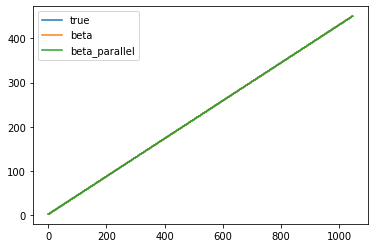

In [75]:
stairs = examples.SmoothStair(n_repeat= 150)

X, y = gaussian_sample(5000, stairs.n_nodes, beta_star = stairs.beta_star, Psi = stairs.Psi, sigma = 2)

start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_greedy(X, y, stairs.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", update_loops)

start_time = timeit.default_timer()
beta, iters, comps = cgd_solver(X, y, stairs.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)
print("computations?", comps)


print("beta_normal", beta)
print("beta_parallel", beta_parallel)
print("normed diff normal", la.norm(beta - stairs.beta_star)/np.sqrt(len(beta)))
print("normed diff parallel", la.norm(beta_parallel - stairs.beta_star)/np.sqrt(len(beta_parallel)))


plt.plot(stairs.beta_star, label = 'true')
plt.plot(beta, label = 'beta')
plt.plot(beta_parallel, label = 'beta_parallel')

plt.legend()

print(np.max(la.norm(beta - stairs.beta_star)), np.max(la.norm(beta_parallel - stairs.beta_star)))

In [14]:
def cgd_solver(X, y, Gamma, lambda1, lambda2, eps = 1e-5, max_it = 50000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv

    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v

    u = np.zeros(m)
    n_iter = 0
    comps = 0
    #print(m)
    prev_u = 0 # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return X_til_pinv @ (y_v - Gamma_v.T @ u)
        for i in range(m):
            if Q[i, i] > 1e-4:
                t = 1/Q[i,i] * (b[i] - np.dot(np.delete(Q[i], i), np.delete(u, i)))
                comps +=1 
            else:
                t = 0

            u[i] = np.sign(t) * min(np.abs(t), lambda1)   #there should be better truncation methods

        if la.norm(u - prev_u) <= eps:
            break

        prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter, comps

def eval_obj(Q, b, v): 
    return 0.5*(np.dot(v, Q@v)) - np.dot(b, v)

def cgd_solver_parallel(X, y, Gamma, lambda1, lambda2, weight = 5, processors = 20, eps = 1e-5, max_it = 800000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv
    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v
    
    single_blocks = np.arange(m)
    max_vals = [max(Q[i]) for i in range(Q.shape[0])]
    
    
    u = np.zeros(m)
    n_iter = 0
    update_loops = 0
    prev_u = 0 # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return (X_til_pinv @ (y_v - Gamma_v.T @ u)), n_iter, update_loops
        updates = []

        samples = np.random.choice(single_blocks, processors, replace = False)
        for i in samples: 
            update_loops +=1
            t = -(np.dot(Q[i], u) + b[i])/(processors*max_vals[i])
            updates.append((i, t))
            
        #print(np.shape(samples))
        
        for pair in updates:
            index = pair[0]
            update = pair[1]
            u[index] = np.sign(u[index] + update) * min(u[index] + update, lambda1)
            
                #break
            
            #there should be better truncation methods
            
        if la.norm(u - prev_u) <= eps:
            break

        prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter, update_loops

In [31]:
np.random.rand(3, 3)[[1, 2]]

array([[0.1021121 , 0.71883102, 0.51511085],
       [0.33757767, 0.96848289, 0.73587841]])

In [32]:
def cgd_solver_test(X, y, Gamma, lambda1, lambda2, weight = 5, processors = 20, eps = 1e-5, max_it = 800000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv
    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v
    
    single_blocks = np.arange(m)
    max_vals = [max(Q[i]) for i in range(Q.shape[0])]
    
    
    u = np.zeros(m)
    n_iter = 0
    update_loops = 0
    prev_u = 0 # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return (X_til_pinv @ (y_v - Gamma_v.T @ u)), n_iter, update_loops
        updates = []

        samples = np.random.choice(single_blocks, processors, replace = False)
        for i in samples: 
            update_loops +=1
            t = -(np.dot(Q[i], u) + b[i])/(processors*max_vals[i])
            updates.append((i, t))
            
        #print(np.shape(samples))
        
        for pair in updates:
            index = pair[0]
            update = pair[1]
            u[index] = np.sign(u[index] + update) * min(u[index] + update, lambda1)
            
                #break
            
            #there should be better truncation methods
            
        if la.norm(u - prev_u) <= eps:
            break

        prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter, update_loops

In [33]:
barbell.n_nodes

260

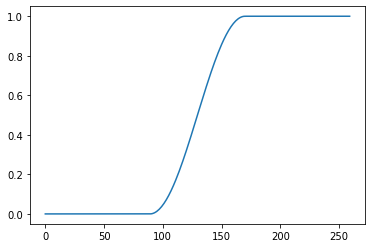

In [34]:
barbell.plot_signal()

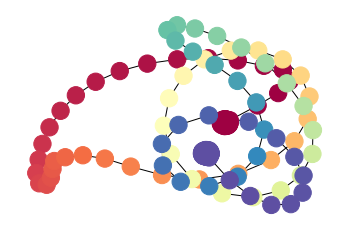

In [35]:
barbell.draw_graph()

In [36]:
barbell.n_nodes

260

In [37]:
nx.number_of_nodes(nx.algorithms.approximation.treewidth_min_degree(barbell.G)[1])

171

In [38]:
barbell = examples.BarbellGraph(length_chain = 80, size_clique = 90)
barbell.n_nodes

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:65: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:68: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


260

In [39]:
barbell.G

In [40]:
smooth2d =Smooth2D()

/var/folders/19/sxn1rm81105bg9w40cjxr_kc0000gn/T/ipykernel_15507/3915449015.py:80: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


In [41]:
nx.number_of_nodes(smooth2d.G)

900

In [42]:
nodes = nx.number_of_nodes(smooth2d.G)

(900,) (900, 900)
duration normal cgd: 2.8425771280017216
iters normal cgd: 5
computations? 8700
2.3876749590053805
[-0.00574196 -0.00354012  0.02039134 ...  0.03076697  0.01960622
 -0.05410843]
break reason 1
duration parallel cgd: 2.425790221997886
iters parallel cgd: 2
update_loops parallel cgd: 0
normed diff normal 0.020693576078228925
normed diff parallel 0.02092311546716191


AttributeError: module 'matplotlib.pyplot' has no attribute 'heatmap'

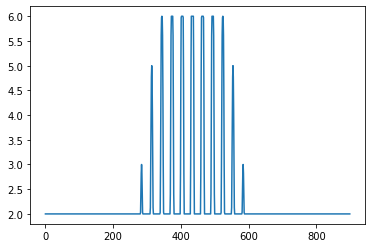

In [43]:
X, y = gaussian_sample(10000, nodes, beta_star = smooth2d.beta_star, Psi = np.eye(nodes), sigma = 2)
start_time = timeit.default_timer()
beta, iters, comps = cgd_solver(X, y, smooth2d.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)
print("computations?", comps)

start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_greedy(X, y, smooth2d.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", update_loops)

#print("beta_normal", beta)
#print("beta_parallel", beta_parallel)
print("normed diff normal", la.norm(beta - smooth2d.beta_star)/np.sqrt(len(beta)))
print("normed diff parallel", la.norm(beta_parallel - smooth2d.beta_star)/np.sqrt(len(beta_parallel)))


plt.plot(smooth2d.beta_star, label = 'true')
plt.heatmap(beta.reshape((int(np.sqrt(nodes)),int(np.sqrt(nodes)))), label = 'bet a')
plt.heatmap(beta_parallel.reshape((int(np.sqrt(nodes)),int(np.sqrt(nodes)))), label = 'beta_terrible')

plt.legend()

#print(np.max(la.norm(beta - barbell.beta_star)), np.max(la.norm(beta_parallel - barbell.beta_star)))

<AxesSubplot:>

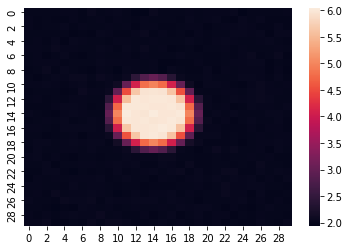

In [44]:

sb.heatmap(beta.reshape((int(np.sqrt(nodes)),int(np.sqrt(nodes)))), label = 'bet a')


<AxesSubplot:>

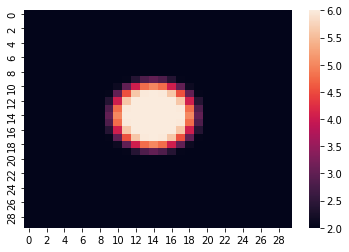

In [45]:
sb.heatmap(smooth2d.beta_star.reshape((int(np.sqrt(nodes)),int(np.sqrt(nodes)))))

<AxesSubplot:>

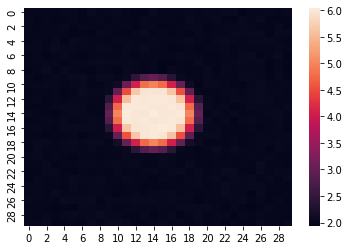

In [46]:
sb.heatmap(beta_parallel.reshape((int(np.sqrt(nodes)),int(np.sqrt(nodes)))))

<AxesSubplot:>

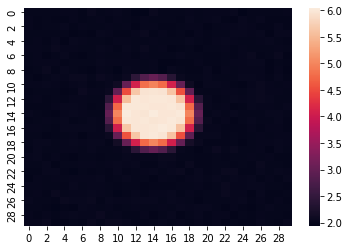

In [47]:
import seaborn as sb
sb.heatmap(beta.reshape((int(np.sqrt(nodes)),int(np.sqrt(nodes)))), label = 'bet a')

In [48]:
beta.reshape((int(np.sqrt(nodes)),int(np.sqrt(nodes))))

array([[1.99867893, 2.00177649, 1.98899243, 1.99701145, 2.00502408,
        2.01605277, 1.97451627, 2.036505  , 1.99645104, 2.00670361,
        2.02282739, 1.99646959, 1.94702292, 1.95164005, 2.04672407,
        2.00185756, 1.99076505, 1.98753888, 2.00578767, 1.99469551,
        2.00996126, 2.01019336, 2.01876911, 2.03172267, 1.95224517,
        1.9998692 , 1.99213605, 2.0024674 , 1.99921179, 2.00347402],
       [2.00376584, 1.98177544, 1.98803287, 1.98021389, 1.97563829,
        2.0130448 , 1.97314143, 1.98842988, 2.00311558, 1.97439659,
        2.00929314, 2.00069757, 1.97948794, 2.01407086, 1.98906456,
        1.99939337, 1.99958149, 1.97783347, 2.03345177, 1.99634997,
        2.00996126, 2.0276643 , 1.98263667, 1.96804935, 2.03045588,
        1.99050546, 2.02142   , 1.98187937, 1.97299713, 1.98638381],
       [2.00291728, 1.97318221, 1.99119145, 1.9964623 , 2.02000773,
        1.98329179, 2.00944549, 2.0010025 , 1.98923968, 2.00588799,
        1.98761814, 2.00291897, 1.9697632 , 2.

In [26]:
barbell = examples.BarbellGraph(length_chain = 70, size_clique = 70)
barbell.n_nodes

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:65: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:68: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


210

not stable for lower values of n... (first arg in X, y) 
try different ways of tau-nice sampling 



In [61]:
param_index = []
size_index = []
coord_desc_times = []
coord_desc_beta = []
coord_desc_iters_comps = []



for i in range(5, 10):
    for j in range(5, 10): 
        length_chain = i*7
        size_clique = j*7
        param_index.append((length_chain, size_clique))
        barbell = examples.BarbellGraph(length_chain = length_chain, size_clique = size_clique)
        size_index.append(barbell.n_nodes)
        X, y = gaussian_sample(10000, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 2)
        start_time = timeit.default_timer()
        beta, iters, comps = cgd_solver(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
        end_time = timeit.default_timer()
        duration = end_time - start_time
        coord_desc_times.append(duration)
        coord_desc_beta.append(beta)
        coord_desc_iters_comps.append((iters,comps))
        

(105,) (105, 105)
(119,) (119, 119)
(133,) (133, 133)
(147,) (147, 147)
(161,) (161, 161)
(112,) (112, 112)
(126,) (126, 126)
(140,) (140, 140)
(154,) (154, 154)
(168,) (168, 168)
(119,) (119, 119)
(133,) (133, 133)
(147,) (147, 147)
(161,) (161, 161)
(175,) (175, 175)
(126,) (126, 126)
(140,) (140, 140)
(154,) (154, 154)
(168,) (168, 168)
(182,) (182, 182)
(133,) (133, 133)
(147,) (147, 147)
(161,) (161, 161)
(175,) (175, 175)
(189,) (189, 189)


In [60]:
param_index = []
size_index = []
coord_desc_parallel_times = []
coord_desc_parallel_beta = []
coord_desc_parallel_iters_comps = []



for i in range(5, 10):
    for j in range(5, 10): 
        length_chain = i*7
        size_clique = j*7
        param_index.append((length_chain, size_clique))
        barbell = examples.BarbellGraph(length_chain = length_chain, size_clique = size_clique)
        size_index.append(barbell.n_nodes)
        X, y = gaussian_sample(10000, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 2)
        start_time = timeit.default_timer()
        beta, iters, comps = cgd_solver_parallel(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
        end_time = timeit.default_timer()
        duration = end_time - start_time
        coord_desc_parallel_times.append(duration)
        coord_desc_parallel_beta.append(beta)
        coord_desc_parallel_iters_comps.append((iters,comps))
        

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:65: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:68: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


(105,) (105, 105)
(119,) (119, 119)
(133,) (133, 133)
(147,) (147, 147)
(161,) (161, 161)
(112,) (112, 112)
(126,) (126, 126)
(140,) (140, 140)
(154,) (154, 154)
(168,) (168, 168)
(119,) (119, 119)
(133,) (133, 133)
(147,) (147, 147)
(161,) (161, 161)
(175,) (175, 175)
(126,) (126, 126)
(140,) (140, 140)
(154,) (154, 154)
(168,) (168, 168)
(182,) (182, 182)
(133,) (133, 133)
(147,) (147, 147)
(161,) (161, 161)
(175,) (175, 175)
(189,) (189, 189)


In [62]:
true_betas = []
coord_desc_normed_diff = []
coord_desc_parallel_normed_diff = []
for i in range(len(param_index)):
    barbell= examples.BarbellGraph(*param_index[i])
    coord_desc_normed_diff.append(la.norm(coord_desc_beta[i] - barbell.beta_star)/np.sqrt(len(coord_desc_beta[i])))
    coord_desc_parallel_normed_diff.append(la.norm(coord_desc_parallel_beta[i] - barbell.beta_star)/np.sqrt(len(coord_desc_parallel_beta[i])))


In [63]:
coord_desc_normed_diff

[0.020809304506166262,
 0.016770107670157033,
 0.017486271840782584,
 0.01684242140701826,
 0.017339730289721165,
 0.01704790793799451,
 0.018585638335757323,
 0.018833365277784387,
 0.017555421703752707,
 0.016670173232533905,
 0.017283995608627045,
 0.018083756437869743,
 0.01750293702428588,
 0.01787245556083634,
 0.016711873960285062,
 0.019127573927117288,
 0.01937433091171429,
 0.018141270341011154,
 0.01731536542158948,
 0.01914768276101682,
 0.018645368663968376,
 0.017928261312093186,
 0.018443692280987915,
 0.01733469237457805,
 0.017520840238917704]

In [64]:
coord_desc_parallel_normed_diff

[0.018542250803860606,
 0.014337778611275921,
 0.014774395720373605,
 0.018572256295891484,
 0.023813172108300706,
 0.015443630449472836,
 0.01676583263535472,
 0.0190650403929132,
 0.019029090636875648,
 0.026178561694877638,
 0.015679748826179837,
 0.014890104637580446,
 0.017616524952847958,
 0.018701862653854075,
 0.02619307604136593,
 0.017983086283877372,
 0.01906189372386306,
 0.017375587991298038,
 0.018909170906942503,
 0.026542223302534525,
 0.016361413318045633,
 0.017578636060652804,
 0.017424647345763926,
 0.01790718232646599,
 0.032372555289854145]

In [58]:
len(coord_desc_beta)

50

In [59]:
len(coord_desc_parallel_beta)

0

In [50]:
barbell = examples.BarbellGraph(*param_index[1])

In [48]:
param_index[1]

(35, 42)

In [27]:
barbell.n_nodes

210

In [ ]:
barbell = examples.BarbellGraph(length_chain = 70, size_clique = 70)

X, y = gaussian_sample(10000, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 2)
start_time = timeit.default_timer()
beta, iters, comps = cgd_solver(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time

start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_parallel(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time

plt.plot(barbell.beta_star, label = 'true')
plt.plot(beta, label = 'beta')
plt.plot(beta_parallel, label = 'beta_terrible')

plt.legend()

print(np.max(la.norm(beta - barbell.beta_star)), np.max(la.norm(beta_parallel - barbell.beta_star)))


In [ ]:
barbell = examples.BarbellGraph(length_chain = 70, size_clique = 70)

X, y = gaussian_sample(10000, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 2)
start_time = timeit.default_timer()
beta, iters, comps = cgd_solver(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)
print("computations?", comps)

start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_parallel(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", update_loops)

print("beta_normal", beta)
print("beta_parallel", beta_parallel)
print("normed diff normal", la.norm(beta - barbell.beta_star)/np.sqrt(len(beta)))
print("normed diff parallel", la.norm(beta_parallel - barbell.beta_star)/np.sqrt(len(beta_parallel)))


plt.plot(barbell.beta_star, label = 'true')
plt.plot(beta, label = 'beta')
plt.plot(beta_parallel, label = 'beta_terrible')

plt.legend()

print(np.max(la.norm(beta - barbell.beta_star)), np.max(la.norm(beta_parallel - barbell.beta_star)))


In [68]:
barbell = examples.BarbellGraph(length_chain = 70, size_clique = 70)

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:65: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:68: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


In [69]:
barbell.n_nodes


210

In [73]:
stairs.n_nodes

2097

In [80]:
barbell = examples.BarbellGraph(length_chain = 70, size_clique = 75)
nx.number_of_edges(barbell.G)


/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:65: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())
/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:68: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


5621

In [ ]:
barbell = examples.BarbellGraph(length_chain = 70, size_clique = 75)

X, y = gaussian_sample(10000, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 2)
start_time = timeit.default_timer()
beta, iters, comps = cgd_solver(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)
print("computations?", comps)

start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_parallel(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", update_loops)

print("beta_normal", beta)
print("beta_parallel", beta_parallel)
print("normed diff normal", la.norm(beta - barbell.beta_star)/np.sqrt(len(beta)))
print("normed diff parallel", la.norm(beta_parallel - barbell.beta_star)/np.sqrt(len(beta_parallel)))


plt.plot(barbell.beta_star, label = 'true')
plt.plot(beta, label = 'beta')
plt.plot(beta_parallel, label = 'beta_terrible')

plt.legend()

print(np.max(la.norm(beta - barbell.beta_star)), np.max(la.norm(beta_parallel - barbell.beta_star)))

(220,) (220, 220)
duration normal cgd: 5.628245926985983
iters normal cgd: 15
computations? 84315
Iterations exceed max_it
duration parallel cgd: 83.49897339500603
iters parallel cgd: 300000
update_loops parallel cgd: 5999980
beta_normal [-2.61005279e-02  8.32919336e-03  3.75275774e-02  8.51348693e-03
 -1.34029539e-02  1.07410851e-02 -2.34510305e-02 -1.41689286e-03
  1.29929289e-02 -2.81345596e-02  2.01803782e-02  2.38510383e-03
 -1.12066137e-03  1.69066658e-02  1.55206169e-03 -2.14513549e-02
  2.38510383e-03  4.14037523e-03 -1.41689285e-03  3.53547337e-04
  8.32919327e-03  1.29929289e-02 -8.40808612e-03 -5.03892185e-04
 -1.82218310e-02  1.07410851e-02  3.45006757e-02  8.32919320e-03
  4.62282165e-03 -1.45174207e-02  3.15664283e-02  8.32919317e-03
  1.67660456e-02 -9.67691548e-04  3.53547349e-04 -4.32116865e-03
 -1.17256179e-03  1.75287656e-02  1.07410851e-02 -8.40729718e-03
  7.10611378e-03  1.28240536e-02  2.38510382e-03 -5.03892187e-04
  1.70165293e-03  8.32919317e-03 -3.57456833e-0

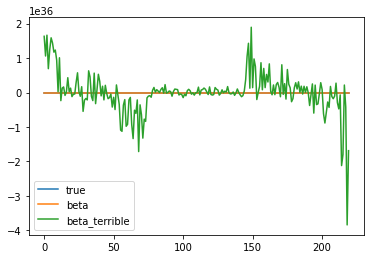

In [84]:
barbell = examples.BarbellGraph(length_chain = 70, size_clique = 75)
n =10000
sigma = 2
rho_gamma = 1
lambda1 = 32* sigma  * np.sqrt(np.log(barbell.n_nodes)/n)
lambda2 = lambda1

X, y = gaussian_sample(n, barbell.n_nodes, 
                       beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = sigma)
start_time = timeit.default_timer()
beta, iters, comps = cgd_solver(X, y, barbell.incidence, lambda1 = lambda1, lambda2 = lambda2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)
print("computations?", comps)

start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_parallel(X, y, barbell.incidence, 
                                                         lambda1 = lambda1, lambda2 = lambda2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", update_loops)

print("beta_normal", beta)
print("beta_parallel", beta_parallel)
print("normed diff normal", la.norm(beta - barbell.beta_star)/np.sqrt(len(beta)))
print("normed diff parallel", la.norm(beta_parallel - barbell.beta_star)/np.sqrt(len(beta_parallel)))


plt.plot(barbell.beta_star, label = 'true')
plt.plot(beta, label = 'beta')
plt.plot(beta_parallel, label = 'beta_terrible')

plt.legend()

print(np.max(la.norm(beta - barbell.beta_star)), np.max(la.norm(beta_parallel - barbell.beta_star)))

In [16]:
X, y = gaussian_sample(25000, stairs.n_nodes, beta_star = stairs.beta_star, Psi = stairs.Psi, sigma = 1)

(67,) (67, 67)


In [17]:
np.shape(X)

(25000, 67)

In [18]:
len(X)

25000

In [19]:
np.shape(y)

(25000,)

In [20]:
def cgd_solver_parallel(X, y, Gamma, lambda1, lambda2, weight = 5, processors = 20, eps = 1e-5, max_it = 300000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv
    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v
    
    single_blocks = np.arange(m)
    max_vals = [max(Q[i]) for i in range(Q.shape[0])]
    
    
    u = np.zeros(m)
    n_iter = 0
    update_loops = 0
    prev_u = 0 # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return (X_til_pinv @ (y_v - Gamma_v.T @ u)), n_iter, update_loops
        updates = []

        samples = np.random.choice(single_blocks, processors, replace = False)
        for i in samples: 
            update_loops +=1
            t = -(np.dot(Q[i], u) + b[i])/(processors*max_vals[i])
            updates.append((i, t))
            
        #print(np.shape(samples))
        
        for pair in updates:
            index = pair[0]
            update = pair[1]
            u[index] = np.sign(u[index] + update) * min(u[index] + update, lambda1)
            
                #break
            
            #there should be better truncation methods
            
        if la.norm(u - prev_u) <= eps:
            break

        prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter, update_loops

In [27]:
stairs = examples.SmoothStair(n_repeat= 500)

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:55: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


In [28]:
stairs.n_nodes

3497

/Users/vvr/jupyter/network_regularisation_test/simulations/examples.py:55: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.incidence = np.asarray(nx.incidence_matrix(self.G, oriented=True).T.todense())


(3497,) (3497, 3497)
duration normal cgd: 24.231293628000003
iters normal cgd: 6
computations? 20976
duration parallel cgd: 31.907744768000157
iters parallel cgd: 36002
update_loops parallel cgd: 720040
beta_normal [   3.24488061    3.24488061    3.24488061 ... 1499.01616864 1499.1125007
 1499.1125007 ]
beta_parallel [   3.02732029    2.7699964     2.77471217 ... 1499.31697203 1499.56083675
 1499.56624721]
normed diff normal 0.7293286505750544
normed diff parallel 0.7277251457582665
43.12916902842037 43.0343450691167


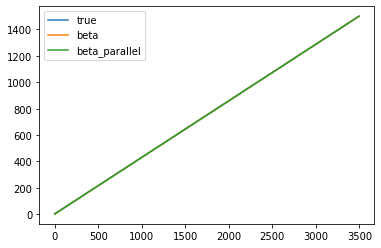

In [32]:
stairs = examples.SmoothStair(n_repeat= 500)

X, y = gaussian_sample(500, stairs.n_nodes, beta_star = stairs.beta_star, Psi = stairs.Psi, sigma = 2)
start_time = timeit.default_timer()
beta, iters, comps = cgd_solver(X, y, stairs.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)
print("computations?", comps)

start_time = timeit.default_timer()
beta_parallel, iters, update_loops = cgd_solver_parallel(X, y, stairs.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", update_loops)

print("beta_normal", beta)
print("beta_parallel", beta_parallel)
print("normed diff normal", la.norm(beta - stairs.beta_star)/np.sqrt(len(beta)))
print("normed diff parallel", la.norm(beta_parallel - stairs.beta_star)/np.sqrt(len(beta_parallel)))


plt.plot(stairs.beta_star, label = 'true')
plt.plot(beta, label = 'beta')
plt.plot(beta_parallel, label = 'beta_parallel')

plt.legend()

print(np.max(la.norm(beta - stairs.beta_star)), np.max(la.norm(beta_parallel - stairs.beta_star)))

In [ ]:
def cgd_solver_parallel(X, y, Gamma, lambda1, lambda2, weight = 5, processors = 20, eps = 1e-5, max_it = 300000):

In [22]:
X, y = gaussian_sample(10000, stairs.n_nodes, beta_star = stairs.beta_star, Psi = stairs.Psi, sigma = 5)
start_time = timeit.default_timer()
beta, iters = cgd_solver(X, y, stairs.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)

start_time = timeit.default_timer()
beta_terrible, iters, update_loops = cgd_solver_terrible(X, y, stairs.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", iters)

print("beta_normal", beta)
print("beta_parallel", beta_terrible)
print("normed diff", la.norm(beta - beta_terrible)/np.sqrt(len(beta)))

plt.plot(beta, label = 'beta')
plt.plot(stairs.beta_star, label = 'true')
plt.plot(beta_terrible, label = 'beta_terrible')

plt.legend()


(67,) (67, 67)


ValueError: too many values to unpack (expected 2)

(60,) (60, 60)
401
duration normal cgd: 0.12652880599989658
iters normal cgd: 20
duration parallel cgd: 0.02012474299999667
iters parallel cgd: 172
update_loops parallel cgd: 172
beta_normal [ 0.0051389   0.01166059  0.01166059  0.00628201  0.00242454  0.01166059
  0.01945721  0.01166059  0.04858836  0.01166059  0.01166059  0.01166059
  0.01166059  0.00628201  0.01166058  0.01166058  0.01166059  0.01001487
  0.01166059 -0.01421972  0.04565786 -0.05372455  0.11782404  0.07353808
  0.10724707  0.21017127  0.21787502  0.31126075  0.43625994  0.51892958
  0.51892958  0.54559888  0.72314989  0.78702999  0.78702999  0.84313944
  0.95616853  0.95794826  0.98604706  1.03387929  0.98655704  1.00710961
  1.01503625  1.01711492  1.01255573  1.01711492  1.0032441   1.01503625
  1.0032441   1.00324409  1.00324409  1.01711492  1.00324409  0.9990286
  1.00324409  1.00324409  1.00324409  1.00324409  1.01711492  1.00324409]
beta_parallel [ 0.00710153  0.01411992  0.05252002  0.01697053 -0.01482767  0.0

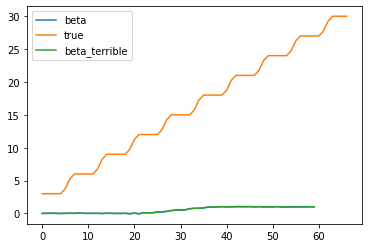

In [85]:
X, y = gaussian_sample(500, barbell.n_nodes, beta_star = barbell.beta_star, Psi = np.eye(barbell.n_nodes), sigma = 1)
start_time = timeit.default_timer()
beta, iters = cgd_solver(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration normal cgd:", duration)
print("iters normal cgd:", iters)

start_time = timeit.default_timer()
beta_terrible, iters, update_loops = cgd_solver_terrible(X, y, barbell.incidence, lambda1 = 1, lambda2 = 2)
end_time = timeit.default_timer()
duration = end_time - start_time
print("duration parallel cgd:", duration)
print("iters parallel cgd:", iters)
print("update_loops parallel cgd:", iters)

print("beta_normal", beta)
print("beta_parallel", beta_terrible)
print("normed diff", la.norm(beta - beta_terrible)/np.sqrt(len(beta)))

plt.plot(beta, label = 'beta')
plt.plot(stairs.beta_star, label = 'true')
plt.plot(beta_terrible, label = 'beta_terrible')

plt.legend()


improves when you decrease the step size (error)

norm current vs norm previous on with few processors does terribly compared to many processors

does better when n gets higher

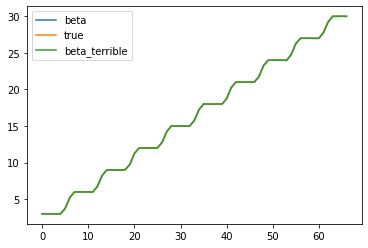

In [58]:
plt.plot(beta, label = 'beta')
plt.plot(stairs.beta_star, label = 'true')
plt.plot(beta_terrible, label = 'beta_terrible')

plt.legend()

In [ ]:
plt.plot(stairs.beta_star)

In [ ]:
beta

In [ ]:
np.linalg.norm(beta - stairs.beta_star)

In [ ]:
stairs.incidence.shape[0]

In [ ]:
X_til, y_til = np.vstack((X, np.sqrt(2) * stairs.incidence)), np.concatenate((y, np.zeros(stairs.incidence.shape[0])))
X_til_pinv = la.pinv(X_til)

In [ ]:
(stairs.incidence @ X_til_pinv)[-2:]

In [ ]:
stairs.incidence @ stairs.incidence.T

In [ ]:
gamma_til = (stairs.incidence @ X_til_pinv)

In [ ]:
list = [sum((stairs.incidence @ X_til_pinv)[i] != 0) for i in range(len(gamma_til))]

In [ ]:
np.shape(gamma_til)

In [ ]:
np.shape(stairs.incidence)

In [ ]:
np.shape(X_til)

In [ ]:
import numpy as np
import pywt
from numpy import linalg as la



def cgd_solver_terrible_replace(X, y, Gamma, lambda1, lambda2, processors = 20, eps = 1e-4, max_it = 10000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv
    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v
    
    single_blocks = np.arange(m)
    max_vals = [max(Q[i]) for i in range(Q.shape[0])]
    
    
    u = np.zeros(m)
    n_iter = 0
    prev_u = 0 # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return (X_til_pinv @ (y_v - Gamma_v.T @ u)), n_iter
        updates = []
        
        try:
            samples = np.random.choice(single_blocks, processors, replace = False)
        except: 
            return (X_til_pinv @ (y_v - Gamma_v.T @ u)), n_iter
        
        for i in samples: 
            t = -(np.dot(Q[i], u) + b[i])/(processors*max_vals[i]/10)
            updates.append((i, t))
        
        for pair in updates:
            index = pair[0]
            update = pair[1]
            prev_u = u[index]
            u[index] = np.sign(u[index] + update) * min(u[index] + update, lambda1)
            
            if la.norm(u[index] - prev_u) <= eps:
                np.delete(single_blocks, index)
            
            if len(single_blocks) < processors: 
                processors -= 1
        #if la.norm(u - prev_u) <= eps:
            #break

        #prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter

In [ ]:
import numpy as np
import pywt
from numpy import linalg as la



def cgd_solver(X, y, Gamma, lambda1, lambda2, eps = 1e-4, max_it = 50000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv

    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v

    u = np.zeros(m)
    n_iter = 0
    prev_u = 0 # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return X_til_pinv @ (y_v - Gamma_v.T @ u)
        for i in range(m):
            if Q[i, i] > 1e-4:
                t = 1/Q[i,i] * (b[i] - np.dot(np.delete(Q[i], i), np.delete(u, i)))
            else:
                t = 0

            u[i] = np.sign(t) * min(np.abs(t), lambda1)   #there should be better truncation methods

        if la.norm(u - prev_u) <= eps:
            break

        prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter

In [ ]:
import numpy as np
import pywt
from numpy import linalg as la



def cgd_solver(X, y, Gamma, lambda1, lambda2, processors = 2, eps = 1e-4, max_it = 50000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv
    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v
    
    single_blocks = np.arange(m)
    max_vals = [max(Q[i]) for i in range(Q.shape[0])]
    
    
    u = np.zeros(m)
    n_iter = 0
    prev_u = 0 # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return X_til_pinv @ (y_v - Gamma_v.T @ u)
        updates = []

        samples = np.random.choice(single_blocks, processors, repeat = False)
        for i in samples: 
            t = -(np.dot(Q[i], u) + b)/(processors*max_vals[i])
            updates.append((i, t))
        
        for pair in updates:
            u[pair[0]] = np.sign(u[pair[0]] + t) * min(u[pair[0]] + t, lambda1)
            
            #there should be better truncation methods
            
        #if la.norm(u - prev_u) <= eps:
            #break

        #prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter

In [ ]:
X.shape

In [ ]:
np.random.choice(np.arange(5), 2)

In [ ]:
[max(X[i]) for i in range(X.shape[0])]

In [ ]:
barbell = examples.Barbell()

In [19]:
import numpy as np
import pywt
from numpy import linalg as la



def cgd_solver_terrible(X, y, Gamma, lambda1, lambda2, processors = 20, eps = 1e-4, max_it = 10000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv
    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v
    
    single_blocks = np.arange(m)
    max_vals = [max(Q[i]) for i in range(Q.shape[0])]
    
    
    u = np.zeros(m)
    n_iter = 0
    prev_u = 0 # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return (X_til_pinv @ (y_v - Gamma_v.T @ u)), n_iter
        updates = []
        
        try:
            samples = np.random.choice(single_blocks, processors, replace = False)
        except: 
            return (X_til_pinv @ (y_v - Gamma_v.T @ u)), n_iter
        
        for i in samples: 
            t = -(np.dot(Q[i], u) + b[i])/(processors*max_vals[i]/10)
            updates.append((i, t))
        
        for pair in updates:
            index = pair[0]
            update = pair[1]
            prev_u = u[index]
            u[index] = np.sign(u[index] + update) * min(u[index] + update, lambda1)
            
            if la.norm(u[index] - prev_u) <= eps:
                np.delete(single_blocks, index)
            
            if len(single_blocks) < processors: 
                processors -= 1
        #if la.norm(u - prev_u) <= eps:
            #break

        #prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter

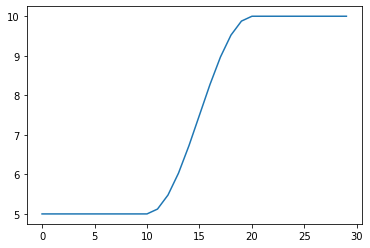

In [14]:
t = np.arange(5, 15, 1)


increasing_part = 7.5 + 2.5*np.sin(np.pi*t/10 - np.pi)
flat_part = np.array([5]*10)
#beta = cflat_part, increasing_part, 5 + flat_part)

beta = np.concatenate((flat_part, increasing_part, 5 + flat_part))

plt.plot(beta)

In [120]:
def cgd_solver_parallel_2(X, y, Gamma, lambda1, lambda2, weight = 5, processors = 20, eps = 1e-5, max_it = 50000):
    m, p = Gamma.shape
    X_til, y_til = np.vstack((X, np.sqrt(2*lambda2) * Gamma)), np.concatenate((y, np.zeros(m)))
    X_til_pinv = la.pinv(X_til)

    y_v = X_til @ X_til_pinv @ y_til
    Gamma_v = Gamma @ X_til_pinv
    Q = Gamma_v @ Gamma_v.T
    b = Gamma_v @ y_v
    
    single_blocks = np.arange(m)
    max_vals = [max(Q[i]) for i in range(Q.shape[0])]
    
    
    u = np.zeros(m)
    n_iter = 0
    update_loops = 0
    prev_u = np.copy(u) # For stopping criteria
    while True:
        n_iter += 1
        if n_iter >= max_it:
            #raise ValueError("Iterations exceed max_it")
            print("Iterations exceed max_it")
            return (X_til_pinv @ (y_v - Gamma_v.T @ u)), n_iter, update_loops
        updates = []

        samples = np.random.choice(single_blocks, processors, replace = False)
        for i in samples: 
            t = -(np.dot(Q[i], u) + b[i])/(processors*max_vals[i]*weight)
            updates.append((i, t))
        
        for pair in updates:
            index = pair[0]
            update = pair[1]
            u[index] = np.sign(u[index] + update) * min(u[index] + update, lambda1)
            update_loops +=1
            
                #break
            
            #there should be better truncation methods
            
        if la.norm(u - prev_u) <= eps:
            break
            
        #print(prev_u)
        #print(u)
        
        ##print(eval_obj(Q, b, u) )
        #print(eval_obj(Q, b, prev_u))
        
        if eval_obj(Q, b, u) > eval_obj(Q, b, prev_u):
            u = prev_u

        prev_u = np.copy(u)   # Recall array is similar to list

    beta = X_til_pinv @ (y_v - Gamma_v.T @ u)
    return beta, n_iter, update_loops